# NB: Deeper Into Pandas

## Set Up

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
import sys
sys.getsizeof(iris)

14764

In [4]:
iris.iloc[:,:4]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris.iloc[:,:4].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [6]:
iris.iloc[:,:4].mean(axis=1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [7]:
iris.iloc[:,:4].mean(axis=None)

3.4644999999999997

In [8]:
iris.iloc[:,:4].head().style.background_gradient(cmap="YlGnBu", axis=None)

,sepal_length,sepal_width,petal_length,petal_width
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000


## Apply Lambda Functions with `.apply()`

Apply a transformation to each record. Uses a `lambda` function.

The `apply()` method should be used after you have established that you can't use a vectorized function.

In [9]:
iris['sepal_len_sq'] = iris.sepal_length.apply(lambda x: x**2)
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_len_sq
0,5.1,3.5,1.4,0.2,setosa,26.01
1,4.9,3.0,1.4,0.2,setosa,24.01
2,4.7,3.2,1.3,0.2,setosa,22.09
3,4.6,3.1,1.5,0.2,setosa,21.16
4,5.0,3.6,1.4,0.2,setosa,25.00


Transformation involving multiple columns. Uses `axis=1` to access columns.  
Compute average of `sepal_length`, `sepal_width`:

In [10]:
iris['sepal_len_wid_avg'] = iris[['sepal_length','sepal_width']]\
    .apply(lambda x: (x.sepal_length + x.sepal_width) / 2, axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_len_sq,sepal_len_wid_avg
0,5.1,3.5,1.4,0.2,setosa,26.01,4.30
1,4.9,3.0,1.4,0.2,setosa,24.01,3.95
2,4.7,3.2,1.3,0.2,setosa,22.09,3.95
3,4.6,3.1,1.5,0.2,setosa,21.16,3.85
4,5.0,3.6,1.4,0.2,setosa,25.00,4.30


**Vectorized Version**

In [11]:
iris['foo'] = iris.sepal_length**2

In [12]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_len_sq,sepal_len_wid_avg,foo
0,5.1,3.5,1.4,0.2,setosa,26.01,4.30,26.01
1,4.9,3.0,1.4,0.2,setosa,24.01,3.95,24.01
2,4.7,3.2,1.3,0.2,setosa,22.09,3.95,22.09
3,4.6,3.1,1.5,0.2,setosa,21.16,3.85,21.16
4,5.0,3.6,1.4,0.2,setosa,25.00,4.30,25.00
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,44.89,4.85,44.89
146,6.3,2.5,5.0,1.9,virginica,39.69,4.40,39.69
147,6.5,3.0,5.2,2.0,virginica,42.25,4.75,42.25
148,6.2,3.4,5.4,2.3,virginica,38.44,4.80,38.44


In [13]:
%time iris.sepal_length**2

CPU times: user 63 µs, sys: 70 µs, total: 133 µs
Wall time: 137 µs


0      26.01
1      24.01
2      22.09
3      21.16
4      25.00
       ...  
145    44.89
146    39.69
147    42.25
148    38.44
149    34.81
Name: sepal_length, Length: 150, dtype: float64

Compare to `.apply()`

In [14]:
%time iris.sepal_length.apply(lambda x: x**2)

CPU times: user 234 µs, sys: 0 ns, total: 234 µs
Wall time: 240 µs


0      26.01
1      24.01
2      22.09
3      21.16
4      25.00
       ...  
145    44.89
146    39.69
147    42.25
148    38.44
149    34.81
Name: sepal_length, Length: 150, dtype: float64

## Aggregation

Involves one or more of:

- splitting the data into groups
- applying a function to each group
- combining results

### `.groupby()`

Compute mean of each column, grouped (separately) by species

In [15]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width,sepal_len_sq,sepal_len_wid_avg,foo
species,,,,,,,
setosa,5.006,3.428,1.462,0.246,25.1818,4.217,25.1818
versicolor,5.936,2.770,4.260,1.326,35.4972,4.353,35.4972
virginica,6.588,2.974,5.552,2.026,43.7980,4.781,43.7980


### `pd.pivot_table()`

Apply a function `aggfunc` to selected values grouped by columns

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

Compute mean sepal length for each species:

In [16]:
pd.pivot_table(iris, values="sepal_length", columns=["species"], aggfunc = np.mean)

species,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588


## Stacking and Unstacking

Similar to pivoting, but requires -- and takes advantage of -- indexes.

### `.unstack()`

[Details](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)

Let's look at what `unstack()` does with a dataset from Seaborn's collection.

In [17]:
attention = sns.load_dataset('attention')

In [18]:
attention.sample(10)

,Unnamed: 0,subject,attention,solutions,score
10,10,11,focused,1,6.0
43,43,4,divided,3,5.0
18,18,19,focused,1,5.0
1,1,2,divided,1,3.0
8,8,9,divided,1,2.0
7,7,8,divided,1,5.0
11,11,12,focused,1,8.0
16,16,17,focused,1,7.0
42,42,3,divided,3,6.0
20,20,1,divided,2,4.0


This dataframe appears to record the results of an experiment on human attention.

Each row is a trial or observation in that experiment.

An analysis of the columns in this dataframe show that 

* `score` is a measured outcome, 
* `subject`s are probably individuals in a comparative study where two groups, 
* those with `attention` `divided` and those with `attention` `focused`, 
* are subject to three different `solutions` applied to the performance of some task. 
* `Unnamed: 0` is just the row number as index.

The purpose of the test performed in each trial seems to be see which solutions are best at overcoming divied attention in the performance of those tasks. 

Let's restructure our data to reflect these assumptions.

In [19]:
attention1 = attention.set_index(['attention','solutions','subject']).sort_index().drop('Unnamed: 0', axis=1)

In [20]:
attention1.head(20)

score
attention solutions subject       
divided   1         1          2.0
                    2          3.0
                    3          3.0
                    4          5.0
                    5          4.0
                    6          5.0
                    7          5.0
                    8          5.0
                    9          2.0
                    10         6.0
          2         1          4.0
                    2          4.0
                    3          5.0
                    4          7.0
                    5          5.0
                    6          5.0
                    7          4.5
                    8          7.0
                    9          3.0
                    10         5.0

We can use `.unstack()` to provide a nice, synoptic view of these data.

In [21]:
attention2 = attention1.unstack()
attention2.fillna('')

score                                                    \
subject                1    2    3    4    5    6    7    8    9    10   11   
attention solutions                                                           
divided   1           2.0  3.0  3.0  5.0  4.0  5.0  5.0  5.0  2.0  6.0        
          2           4.0  4.0  5.0  7.0  5.0  5.0  4.5  7.0  3.0  5.0        
          3           7.0  5.0  6.0  5.0  8.0  6.0  6.0  8.0  7.0  6.0        
focused   1                                                             6.0   
          2                                                             5.0   
          3                                                             6.0   

                                                                  
subject               12   13   14   15   16   17   18   19   20  
attention solutions                                               
divided   1                                                       
          2                                                       
          3                                                       
focused   1          8.0  6.0  8.0  8.0  6.0  7.0  7.0  5.0  6.0  
          2          9.0  5.0  8.0  8.0  8.0  7.0  8.0  6.0  6.0  
          3          8.0  9.0  7.0  7.0  7.0  6.0  6.0  6.0  5.0

In [22]:
attention2.fillna(0).style.background_gradient(axis=None)

We can see clearly the data form two groups by `attention`, each consisting of 10 `subject`s, each employing three solutions.

By unstacking again, we can get a sense of which solution worked best.

In [23]:
attention2.mean(1).unstack().T.style.background_gradient(axis=None)

attention,divided,focused
solutions,,
1,4.000000,6.700000
2,4.950000,7.000000
3,6.400000,6.700000


It appears the solution 3 performed well.

### `.stack()`

Stack is the opposite of `.unstack()`, of course. 

It will **project a column name series into the values of a single column**.

[Details](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)

Let look at this with the `taxis` database.

In [24]:
taxis = sns.load_dataset('taxis')

In [25]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [26]:
taxis1 = taxis.set_index(['pickup','dropoff']).sort_index().stack().to_frame('val')
taxis1.index.names = ['pickup','dropoff','field']

In [27]:
taxis1.sample(10)

,,,val
pickup,dropoff,field,
2019-03-21 08:13:12,2019-03-21 08:27:43,color,yellow
2019-03-20 18:13:02,2019-03-20 18:34:50,color,yellow
2019-03-03 15:28:02,2019-03-03 15:34:11,pickup_borough,Manhattan
2019-03-01 17:38:01,2019-03-01 18:11:26,fare,30.0
2019-03-15 19:33:40,2019-03-15 19:54:59,fare,15.5
2019-03-20 07:18:12,2019-03-20 07:25:51,total,7.3
2019-03-29 14:25:38,2019-03-29 14:36:34,tolls,0.0
2019-03-31 18:09:31,2019-03-31 18:25:30,total,18.36
2019-03-03 09:00:08,2019-03-03 09:09:05,pickup_borough,Manhattan


In [28]:
taxis1.loc['2019-02-28 23:29:03']

val
dropoff             field                                         
2019-02-28 23:32:35 passengers                                   1
                    distance                                   0.9
                    fare                                       5.0
                    tip                                        0.0
                    tolls                                      0.0
                    total                                      6.3
                    color                                    green
                    payment                                   cash
                    pickup_zone                        Old Astoria
                    dropoff_zone     Long Island City/Queens Plaza
                    pickup_borough                          Queens
                    dropoff_borough                         Queens

## Combining DataFrames

### `pd.concat()`  

Concatenate pandas objects along an axis.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

Create two dfs and vertically stack them

In [29]:
df1 = pd.DataFrame(np.random.randn(3, 4))
df2 = pd.DataFrame(np.random.randn(3, 4))

In [30]:
df1

,0,1,2,3
0,-0.129152,-0.014749,0.528338,-1.007138
1,0.643142,-0.637257,1.152109,-0.518798
2,0.741475,1.670850,-0.015079,0.180586


In [31]:
df2

,0,1,2,3
0,0.636836,0.654059,-0.236296,-0.397231
1,2.046555,1.195459,0.437917,0.798151
2,-0.751606,-1.360709,0.955528,1.108308


**Concat rows**

In [32]:
df3 = pd.concat([df1, df2], keys=['a','b'], axis=0)

In [33]:
df3

0         1         2         3
a 0 -0.129152 -0.014749  0.528338 -1.007138
  1  0.643142 -0.637257  1.152109 -0.518798
  2  0.741475  1.670850 -0.015079  0.180586
b 0  0.636836  0.654059 -0.236296 -0.397231
  1  2.046555  1.195459  0.437917  0.798151
  2 -0.751606 -1.360709  0.955528  1.108308

In [69]:
df3.loc['b']

,0,1,2,3
0,0.636836,0.654059,-0.236296,-0.397231
1,2.046555,1.195459,0.437917,0.798151
2,-0.751606,-1.360709,0.955528,1.108308


In [70]:
df3a = pd.concat([df1, df2],  axis=0)

In [73]:
df3a

,0,1,2,3
0,-0.129152,-0.014749,0.528338,-1.007138
1,0.643142,-0.637257,1.152109,-0.518798
2,0.741475,1.670850,-0.015079,0.180586
0,0.636836,0.654059,-0.236296,-0.397231
1,2.046555,1.195459,0.437917,0.798151
2,-0.751606,-1.360709,0.955528,1.108308


**Concat columns**

This assumes that the indexes represent IDs of specific things or events.

In [34]:
df4 = pd.concat([df1, df2], axis=1, keys=['a', 'b'])

In [35]:
df4

a                                       b                      \
          0         1         2         3         0         1         2   
0 -0.129152 -0.014749  0.528338 -1.007138  0.636836  0.654059 -0.236296   
1  0.643142 -0.637257  1.152109 -0.518798  2.046555  1.195459  0.437917   
2  0.741475  1.670850 -0.015079  0.180586 -0.751606 -1.360709  0.955528   

             
          3  
0 -0.397231  
1  0.798151  
2  1.108308

In [36]:
df4.b

,0,1,2,3
0,0.636836,0.654059,-0.236296,-0.397231
1,2.046555,1.195459,0.437917,0.798151
2,-0.751606,-1.360709,0.955528,1.108308


### `.merge()`

SQL-style joining of tables (DataFrames) -- although Pandas has a `.join()` method, too.

Important parameters include:

- `how` : type of merge {'left', 'right', 'outer', 'inner', 'cross'}, default ‘inner’
- `on`  : names to join on
        
[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

Create two tables, `left` and `right`. Then right join them on `key`.  
Right join means include all records from table on right.  
The `key` is used for matching up the records.

In [37]:
left = pd.DataFrame({"key": ["jamie", "bill"], "lval": [15, 22]})
right = pd.DataFrame({"key": ["jamie", "bill", "asher"], "rval": [4, 5, 8]})
merged = pd.merge(left, right, on="key", how="right")

In [38]:
left

,key,lval
0,jamie,15
1,bill,22


In [39]:
right

,key,rval
0,jamie,4
1,bill,5
2,asher,8


In [40]:
merged

,key,lval,rval
0,jamie,15.0,4
1,bill,22.0,5
2,asher,NaN,8


Notice the `NaN` inserted into the record with `key='asher'`, since the left table didn't contain the key.

**Matching column names**  
In this next example, the value columns have the same name: *val*.  Notice what happens to the column names.

In [41]:
left = pd.DataFrame({"key": ["jamie", "bill"], "val": [15, 22]})
right = pd.DataFrame({"key": ["jamie", "bill", "asher"], "val": [4, 5, 8]})
merged = pd.merge(left, right, on="key", how="right")

In [42]:
left

,key,val
0,jamie,15
1,bill,22


In [43]:
right

,key,val
0,jamie,4
1,bill,5
2,asher,8


In [44]:
merged

,key,val_x,val_y
0,jamie,15.0,4
1,bill,22.0,5
2,asher,NaN,8


### `.join()`

An SQL-like joiner, but this one takes advantage of indexes.

Give our dataframes indexes and distinctive columns names.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)

In [45]:
left2 = left.set_index('key').copy()
right2 = right.set_index('key').copy()

In [46]:
left2

,val
key,
jamie,15
bill,22


In [47]:
right2

,val
key,
jamie,4
bill,5
asher,8


In [48]:
right2.join(left2, rsuffix='_y') # Defaults to 'left'

,val,val_y
key,,
jamie,4,15.0
bill,5,22.0
asher,8,NaN


In [49]:
right2.join(left2, rsuffix='_y', how='inner')

,val,val_y
key,,
jamie,4,15
bill,5,22


### Summary

* Use **join** if you have shared indexes
* Use **merge** if you do not have shared indexes
* Use **concat** to combine based on shared indexes or columns
* Pay attention to resulting dataframe indexes and column names

## Reshape with `.reshape()`

Changes the object's shape

We illustrate creating pandas Series, extracting array of length 6, and reshaping to 3x2 array.

Create a series:

In [50]:
ser = pd.Series([1, 1, 2, 3, 5, 8]) 

Extract values:

In [51]:
vals = ser.values 

In [52]:
vals

array([1, 1, 2, 3, 5, 8])

In [53]:
type(vals)

numpy.ndarray

In [54]:
vals.shape

(6,)

Reshaping a series:

In [55]:
reshaped_vals = vals.reshape((3, 2)) 

In [56]:
reshaped_vals

array([[1, 1],
       [2, 3],
       [5, 8]])

In [57]:
type(reshaped_vals)

numpy.ndarray

In [58]:
reshaped_vals.shape

(3, 2)

Including -1 as one of the dimensions tells numpy: **infer** this dimension from the data and the other dimensions.

Example: enforce 3 columns:

In [59]:
vals.reshape(-1,3)

array([[1, 1, 2],
       [3, 5, 8]])

Enforce 3 rows:

In [60]:
vals.reshape(3,-1)

array([[1, 1],
       [2, 3],
       [5, 8]])

Notice the shape of original array: `(6,)`.

This is a vector with one dimension, and is different from two-dimensional `(6,1)` array.

## Categoricals

Categorical data takes discrete values where computation on the values does not make sense.  

Zip code is a typical example.

To include categoricals in models, often they must be converted to numeric form.  

### `get_dummies()`

Dummy code categorical data

Important parameters: 

- `prefix`    : append prefix to column names (a good idea for later use)
- `drop_first`: remove first level, as only `k-1` variables needed to represent `k` levels

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [61]:
cats = pd.DataFrame({'breed':['persian', 'persian', 'siamese', 'himalayan', 'burmese']})

In [62]:
cats

,breed
0,persian
1,persian
2,siamese
3,himalayan
4,burmese


In [63]:
dummy_cats = pd.get_dummies(cats.breed, prefix='breed')

In [64]:
dummy_cats

,breed_burmese,breed_himalayan,breed_persian,breed_siamese
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,False,True,False,False
4,True,False,False,False


In [65]:
pd.get_dummies(cats.breed, drop_first=True, prefix='breed')

,breed_himalayan,breed_persian,breed_siamese
0,False,True,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,False


Notice `burmese` was dropped (first level by alphabet) since it can be inferred.

Let's try it on the `iris` dataset.

In [66]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_len_sq,sepal_len_wid_avg,foo
0,5.1,3.5,1.4,0.2,setosa,26.01,4.30,26.01
1,4.9,3.0,1.4,0.2,setosa,24.01,3.95,24.01
2,4.7,3.2,1.3,0.2,setosa,22.09,3.95,22.09
3,4.6,3.1,1.5,0.2,setosa,21.16,3.85,21.16
4,5.0,3.6,1.4,0.2,setosa,25.00,4.30,25.00
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,44.89,4.85,44.89
146,6.3,2.5,5.0,1.9,virginica,39.69,4.40,39.69
147,6.5,3.0,5.2,2.0,virginica,42.25,4.75,42.25
148,6.2,3.4,5.4,2.3,virginica,38.44,4.80,38.44


Called `get_dummies()` by itself will handle all categoricals for you.

Look at what happened to the `species` column.

In [67]:
pd.get_dummies(iris)

,sepal_length,sepal_width,petal_length,petal_width,sepal_len_sq,sepal_len_wid_avg,foo,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,26.01,4.30,26.01,True,False,False
1,4.9,3.0,1.4,0.2,24.01,3.95,24.01,True,False,False
2,4.7,3.2,1.3,0.2,22.09,3.95,22.09,True,False,False
3,4.6,3.1,1.5,0.2,21.16,3.85,21.16,True,False,False
4,5.0,3.6,1.4,0.2,25.00,4.30,25.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,44.89,4.85,44.89,False,False,True
146,6.3,2.5,5.0,1.9,39.69,4.40,39.69,False,False,True
147,6.5,3.0,5.2,2.0,42.25,4.75,42.25,False,False,True
148,6.2,3.4,5.4,2.3,38.44,4.80,38.44,False,False,True


You can call it one numeric columns, too.

<Axes: >

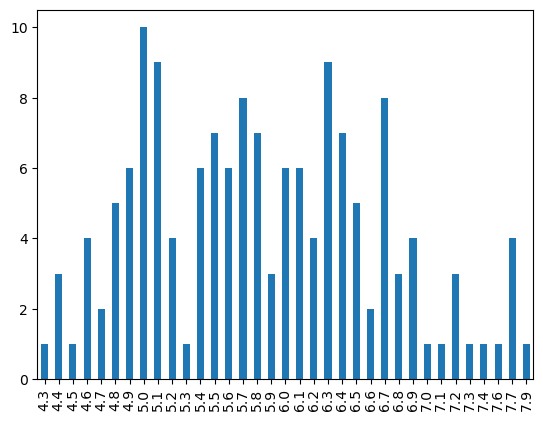

In [68]:
pd.get_dummies(iris.sepal_length).sum().plot.bar()